# a-9. チャート
DataFrame/Seriesともにplot()メソッドが用意されている。これは、matplotlibというPython+numpy向けに開発されたビジュアライゼーションライブラリをラッピングしたメソッドである。
matplotlibをpythonから使う場合はpyplotモジュールが利用される。
このモジュールは、次のセルにあるように、"import matplotlib.pyplot as plt"のようにpltという略称で呼ばれることも多い。
plot()メソッドの簡単な利用であればpltを意識する必要はないが、少し凝ったことをしようとするとpltの知識が必要となる。
以下ではpltの解説は最小限にとどめているので、詳細を知りたい方はpltの解説書を参照してもらいたい。

---
## 1. 折れ線チャートにみるplot()の基本
### &nbsp; 1-1. タイトルなどの設定
### &nbsp; 1-2. ２軸チャートの作成と軸の設定
### &nbsp; 1-3. 複数のチャートを描画する
## 2. 散布図
## 3. ヒストグラム
---

## plot()のパラメータ一覧(抜粋）

|パラメータ|内容|メモ|
|:---|:---|:---|
|kind=|チャートの種類<BR>'line': 折れ線(デフォルト)<BR> 'bar': 横棒<BR> 'barh': 縦棒<BR> 'hist': ヒストグラム<BR> 'box': 箱ひげ図<BR> 'kde': カーネル密度推定<BR> 'area': エリア図<BR> 'pie': 円グラフ<BR> 'scatter': 散布図(DataFrameのみ)<BR> 'hexbin': ビンプロット(２次元ヒストグラム, DataFrameのみ)<BR> ||
|figsize=|プロットの大きさ。単位はインチ(幅,高さ）|figsize=(8,6)|
|title=|プロットに使用するタイトル|
|grid=|グリッド線を表示。デフォルト:None|grid=(True)|
|legend=|サブプロットに凡例を配置。デフォルト:True(表示）|legend=(False)|
|style=|線の書式を指定する。デフォルト:solid|style=['-', '--', '-.', ':']|
|xlabel=|X軸に使用する名前を指定。デフォルト:xlabel||
|ylabel=|Y軸に使用する名前を指定。デフォルト:ylabel||
|fontsize=|x軸とy軸のフォントサイズを指定。デフォルト:None||
|colormap=|カラーマップを指定。デフォルト:None|colormap='BuGn'|
|secondary_y=|２番目のy軸を追加。デフォルト:False|
|xticks=|x軸の目盛りの指定。||
|yticks=|y軸の目盛りの指定。||
|xlim=|x軸の表示範囲の指定。||
|ylim=|y軸の表示範囲の指定。||

---
### 関連ドキュメント
- [Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
    
---
### APIリファレンス
- [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
, [Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)
- [DataFrame.plot.bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)
, [Series.plot.bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html)
- [DataFrame.plot.barh](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)
, [Series.plot.barh](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.barh.html)
- [DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)
, [Series.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html)
- [DataFrame.plot.box](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
, [Series.plot.box](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html)
- [DataFrame.plot.kde](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html)
, [Series.plot.kde](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html)
- [DataFrame.plot.area](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html)
, [Series.plot.area](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.area.html)
- [DataFrame.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)
, [Series.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html)
- [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

---
# 1. 折れ線チャートにみるplot()の基本

### 入力データ
A,B,C,Dの4列の長さ100の乱数系列

<pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
ts = pd.Series(np.random.randn(100), index=pd.period_range('2000-1-1', periods=100))
d = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=["A", "B", "C", "D"])
</pre>

<img width="25%" src="./figures/plotting/plotting1_data.png"><br>
<img width="30%" src="./figures/plotting/plotting2_data.png"><br>

  <table border="1" style="table-layout:fixed;width:100%;">
    <colgroup>
      <col style="width:5%;">
      <col style="width:30%;"> 
      <col style="width:25%;">
      <col style="width:40%;">    
    </colgroup>
<tbody>

<tr><th align="left">no.</th><th align="left">実行コード</th><th>出力</th><th>備考</th></tr>
    
<tr style="background:#fff; border:1px solid #cc0000;">
<td>1-1</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
d = d.cumsum()
ax = d.plot()
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting1-1.png"></td>
<td>
乱数系列を累積して<b>plot()</b>で描画する。
パラメータを何も指定しなければ列ごとに折れ線チャートを描画する。
plot()はmatplotlibのAxesオブジェクトを返し、axesオブジェクトで使えるメソッドを使って多様な設定が可能となる。
</td>
</tr>
    
<tr style="background:#fff; border:1px solid #cc0000;">
<td>1-2</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
ts.plot() 
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting1-2.png"></td>
<td>
Seriesをplot()すれば、その系列の折れ線チャートとなる。
同じセルに複数のplotを描画したければ、
<b>plt.figure()</b>によって描画するキャンバスを初期化する必要がある。
</td>
</tr>
 
</tbody>
</table>


# 入力データ: A,B,C,Dの4列の長さ100の乱数系列
>>> np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
>>> ts = pd.Series(np.random.randn(100), index=pd.period_range('2000-1-1', periods=100))
>>> print(ts)
2000-01-01   -1.133838
2000-01-02    0.384319
2000-01-03    1.496554
2000-01-04   -0.355382
2000-01-05   -0.787534
                ...   
2000-04-05    2.103122
2000-04-06   -1.050397
2000-04-07   -0.127114
2000-04-08   -1.584131
2000-04-09   -0.611074
Freq: D, Length: 100, dtype: float64

>>> d = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=["A", "B", "C", "D"])
>>> print(d)
                   A         B         C         D
2000-01-01  0.103719 -0.033509  0.676452 -1.052249
2000-01-02 -1.371965  0.445663 -1.636416 -0.608057
2000-01-03 -0.173139 -0.925608  0.912658  1.255954
2000-01-04  0.224466 -0.480420  0.462788 -0.270292
2000-01-05 -0.383694  1.211868 -0.489244  0.518549
...              ...       ...       ...       ...
2000-04-05  1.363644  0.454879  0.402704  0.917242
2000-04-06

<AxesSubplot:>

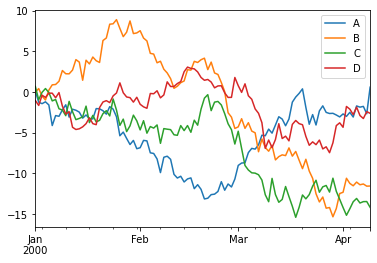

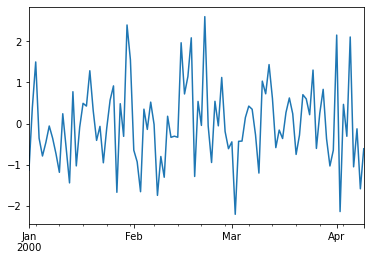

In [8]:
print('''
# 入力データ: A,B,C,Dの4列の長さ100の乱数系列
>>> np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
>>> ts = pd.Series(np.random.randn(100), index=pd.period_range('2000-1-1', periods=100))
>>> print(ts)''')
np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
ts = pd.Series(np.random.randn(100), index=pd.period_range('2000-1-1', periods=100))
print(ts)
print('''
>>> d = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=["A", "B", "C", "D"])
>>> print(d)''')
d = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=["A", "B", "C", "D"])
print(d)

print('''
# no.1_1
# 乱数系列を累積してplot()で描画する。
# パラメータを何も指定しなければ列ごとに折れ線チャートを描画する。
# plot()はmatplotlibのAxesオブジェクトを返し、axesオブジェクトで使えるメソッドを使って多様な設定が可能となる。
>>> d = d.cumsum()
>>> ax = d.plot()''')
d = d.cumsum()
ax = d.plot()


print('''
# no.1_2
# Seriesをplot()すれば、その系列の折れ線チャートとなる。
# 同じセルに複数のplotを描画したければ、plt.figure()によって描画するキャンバスを初期化する必要がある。
>>> plt.figure()
>>> ts.plot()''')
plt.figure()
ts.plot()

---
## 1-1. タイトルなどの設定

  <table border="1" style="table-layout:fixed;width:100%;">
    <colgroup>
      <col style="width:5%;">
      <col style="width:40%;"> 
      <col style="width:25%;">
      <col style="width:30%;">    
    </colgroup>
<tbody>

<tr><th align="left">no.</th><th align="left">実行コード</th><th>出力</th><th>備考</th></tr>
    
<tr style="background:#fff; border:1px solid #cc0000;">
<td>1-1-1</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
ax = d.plot(
    figsize=(6, 4),
    title='title',
    grid=True,
    legend=False,
    style=['-', '-', ':', ':'],
    xlabel='x label',
    ylabel='y label',
    fontsize=14,
    colormap='summer',
    )
ax.text(x='2000-1-10', y=-8, s='sample text', fontsize=10)
</pre></td>
<td><img width="90%" src="./figures/plotting/plotting1-1-1.png"></td>
<td>
上の<b>plot()メソッド</b>で指定するパラメータは、pandasが用意したもので、内部では<b>matplotlibのメソッド</b>が利用されている。
一方で、<b>ax</b>はmatplotlibの<b>Axesオブジェクト</b>であり、どのようなメソッドが使えるかは<b>matplotlibのドキュメント</b>を参照されたい。<br>
ここでは、Axesオブジェクトのメソッド<b>text()</b>を使ってチャートに文字列を表示する。
チャートの<b>(x,y) = ('2000-1-10', -8)</b>の位置に<b>s=</b>で指定した文字列を描画する。
</td>
</tr>
    
</tbody>
</table>

>>> ax = d.plot(
     figsize=(6, 4),  # キャンバスの大きさ(widht,hight)をインチで指定(デフォルトの比率は3:2)
     title='title',  # チャートの上に表示されるタイトル
     grid=True,  # グリッド線
     legend=False,  # 凡例を表示するかどうか
     style=['-', '-', ':', ':'],  # ４列それぞれの線の種類('-': solid, '--': dashed, '-.': dash_dot, ':': dotted, ' ': nothing')
     xlabel='x label',  # X軸のラベル
     ylabel='y label',  # Y軸のラベル
     fontsize=14,  # X,Y軸目盛のフォントサイズ
     colormap='summer',  # 配色(参照: https://matplotlib.org/stable/tutorials/colors/colormaps.html)
     )
     

>>> ax.text(x='2000-1-10', y=-8, s='sample text', fontsize=10)




Text(2000-1-10, -8, 'sample text')

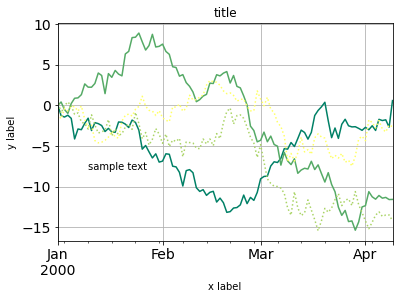

In [9]:
print('''
>>> ax = d.plot(
     figsize=(6, 4),  # キャンバスの大きさ(widht,hight)をインチで指定(デフォルトの比率は3:2)
     title='title',  # チャートの上に表示されるタイトル
     grid=True,  # グリッド線
     legend=False,  # 凡例を表示するかどうか
     style=['-', '-', ':', ':'],  # ４列それぞれの線の種類('-': solid, '--': dashed, '-.': dash_dot, ':': dotted, ' ': nothing')
     xlabel='x label',  # X軸のラベル
     ylabel='y label',  # Y軸のラベル
     fontsize=14,  # X,Y軸目盛のフォントサイズ
     colormap='summer',  # 配色(参照: https://matplotlib.org/stable/tutorials/colors/colormaps.html)
     )
     \n
>>> ax.text(x='2000-1-10', y=-8, s='sample text', fontsize=10)
\n''')

ax = d.plot(
    figsize=(6, 4),  
    title='title',  
    grid=True,  
    legend=False,  
    style=['-', '-', ':', ':'],  
    xlabel='x label', 
    ylabel='y label',  
    fontsize=14,  
    colormap='summer',  
    )

# Axesオブジェクトのメソッドtext()を使ってチャートに文字列を表示する
# チャートの(x,y) = ('2000-1-10', -8)の位置にs=で指定した文字列を描画する。
# 上のplot()メソッドで指定するパラメータは、pandasが用意したもので、内部でmatplotlibのメソッドが利用されている。
# 一方で下のaxはmatplotlibのAxesオブジェクトであり、どのようなメソッドが使えるかはmatplotlibのドキュメントを参照されたい。
# https://matplotlib.org/stable/api/axes_api.html#subplots
ax.text(x='2000-1-10', y=-8, s='sample text', fontsize=10)


---
## 1-2. 2軸チャートの作成と軸の設定

  <table border="1" style="table-layout:fixed;width:100%;">
    <colgroup>
      <col style="width:5%;">
      <col style="width:40%;"> 
      <col style="width:25%;">
      <col style="width:30%;">    
    </colgroup>
<tbody>

<tr><th align="left">no.</th><th align="left">実行コード</th><th>出力</th><th>備考</th></tr>
  
<tr style="background:#fff; border:1px solid #cc0000;">
<td>1-2-1</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
 ax = d[['A', 'B']].plot(
    secondary_y='B',  # 第２軸の列名
    yticks=[-12, -6, 0],  # Y軸の目盛として使う値
    xticks=['2000-1-1', '2000-2-1'],  # X軸の目盛として使う値
    xlim=['2000-1-1', '2000-2-28'],  # X軸の範囲
    ylim=[-20, 5],  # Y軸の範囲
    # logy = True,  # Y軸をlog scaleにする。
    # logx = True,  # X軸をlog scaleにする。
    # loglog = True,  # X,Y軸ともにlog scaleにする。
    )
</pre></td>
<td><img width="90%" src="./figures/plotting/plotting1-2-1.png"></td>
<td>
secondary_y=で第２軸の列名を指定すると２軸チャートとなる。
</td>
</tr>

</tbody>
</table>


ax = d[['A', 'B']].plot(
    secondary_y='B',  # 第２軸の列名
    yticks=[-12, -6, 0],  # Y軸の目盛として使う値
    xticks=['2000-1-1', '2000-2-1'],  # X軸の目盛として使う値
    xlim=['2000-1-1', '2000-2-28'],  # X軸の範囲
    ylim=[-20, 5],  # Y軸の範囲
    # logy = True,  # Y軸をlog scaleにする。
    # logx = True,  # X軸をlog scaleにする。
    # loglog = True,  # X,Y軸ともにlog scaleにする。
)



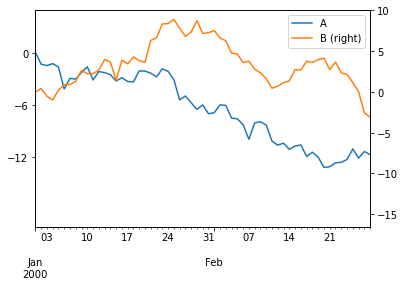

In [12]:
print('''
>>> ax = d[['A', 'B']].plot(
    secondary_y='B',  # 第２軸の列名
    yticks=[-12, -6, 0],  # Y軸の目盛として使う値
    xticks=['2000-1-1', '2000-2-1'],  # X軸の目盛として使う値
    xlim=['2000-1-1', '2000-2-28'],  # X軸の範囲
    ylim=[-20, 5],  # Y軸の範囲
    # logy = True,  # Y軸をlog scaleにする。
    # logx = True,  # X軸をlog scaleにする。
    # loglog = True,  # X,Y軸ともにlog scaleにする。
)
''')

ax = d[['A', 'B']].plot(
    secondary_y='B',  
    yticks=[-12, -6, 0],  
    xticks=['2000-1-1', '2000-2-1'],  
    xlim=['2000-1-1', '2000-2-28'], 
    ylim=[-20, 5], 
)


---
## 1-3. 複数のチャートを描画する

  <table border="1" style="table-layout:fixed;width:100%;">
    <colgroup>
      <col style="width:5%;">
      <col style="width:40%;"> 
      <col style="width:25%;">
      <col style="width:30%;">    
    </colgroup>
<tbody>

<tr><th align="left">no.</th><th align="left">実行コード</th><th>出力</th><th>備考</th></tr>
  
<tr style="background:#fff; border:1px solid #cc0000;">
<td>1-3-1</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
ax = d.plot(
    figsize=(12,8),  # キャンバスの大きさ(width,heightをinchで指定)
    subplots=True,  # 複数のplotに分割して描画するか
    layout=(2,2)  # subplots=Trueの時、縦横何分割して描画するか
    )
ax[0][0].set_title('title00')
ax[0][1].set_title('title01')
ax[1][0].set_title('title10')
ax[1][1].set_title('title11')
</pre></td>
<td><img width="100%" src="./figures/plotting/plotting1-3-1.png"></td>
<td>
subplots=とlayout=を指定することで複数のチャートを描画できる。
set_title()で、それぞれのsubplotにタイトルやテキストをセットできる。
同様にそれぞれの軸や線の調整も可能である(説明省略)。
</td>
</tr>

</tbody>
</table>

>>> ax = d.plot(
   　　 figsize=(12,8),  # キャンバスの大きさ(width,heightをinchで指定)
   　　 subplots=True,  # 複数のplotに分割して描画するか
   　　 layout=(2,2))  # subplots=Trueの時、縦横何分割して描画するか

# それぞれのsubplotにタイトルやテキストをセットする例
# 同様にそれぞれの軸や線の調整も可能である。
>>> ax[0][0].set_title('title00')
>>> ax[0][1].set_title('title01')
>>> ax[1][0].set_title('title10')
>>> ax[1][1].set_title('title11')
>>> ax[0][0].text(
        x='2000-1-10',
        y=-8,
        s='sample text',
        fontsize=10
    )


Text(2000-1-10, -8, 'sample text')

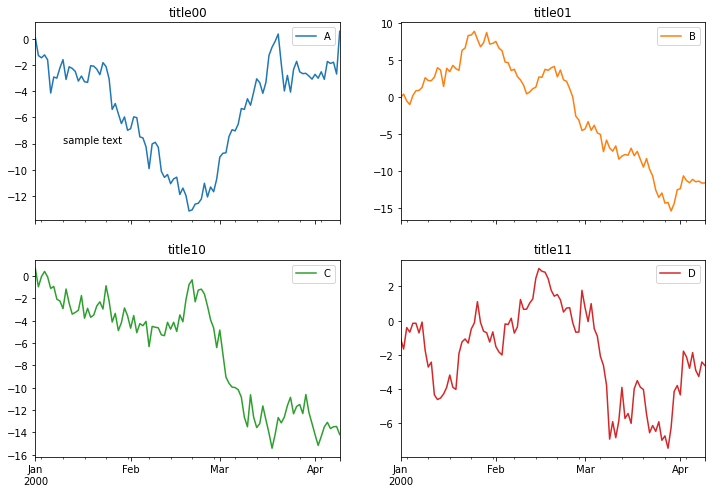

In [5]:
print('''
>>> ax = d.plot(
   　　 figsize=(12,8),  # キャンバスの大きさ(width,heightをinchで指定)
   　　 subplots=True,  # 複数のplotに分割して描画するか
   　　 layout=(2,2))  # subplots=Trueの時、縦横何分割して描画するか''')
ax = d.plot(
    figsize=(12,8),
    subplots=True,  
    layout=(2,2)  
)

print('''
# それぞれのsubplotにタイトルやテキストをセットする例
# 同様にそれぞれの軸や線の調整も可能である。
>>> ax[0][0].set_title('title00')
>>> ax[0][1].set_title('title01')
>>> ax[1][0].set_title('title10')
>>> ax[1][1].set_title('title11')
>>> ax[0][0].text(
        x='2000-1-10',
        y=-8,
        s='sample text',
        fontsize=10
    )''')
ax[0][0].set_title('title00')
ax[0][1].set_title('title01')
ax[1][0].set_title('title10')
ax[1][1].set_title('title11')
ax[0][0].text(
    x='2000-1-10',
    y=-8, 
    s='sample text', 
    fontsize=10
)


---
# 2.　散布図

  <table border="1" style="table-layout:fixed;width:100%;">
    <colgroup>
      <col style="width:5%;">
      <col style="width:40%;"> 
      <col style="width:25%;">
      <col style="width:30%;">    
    </colgroup>
<tbody>

<tr><th align="left">no.</th><th align="left">実行コード</th><th>出力</th><th>備考</th></tr>
  
<tr style="background:#fff; border:1px solid #cc0000;">
<td>2-1</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d.plot(kind='scatter', x='A', y='B')
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting2-1.png"></td>
<td>
A列とB列をX,Y軸とした散布図を描画する。
</td>
</tr>
 
<tr style="background:#fff; border:1px solid #cc0000;">
<td>2-2</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d.plot(kind='scatter', x='A', y='B', s=d['C'].abs()*50)
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting2-2.png"></td>
<td>
C列の絶対値を50倍した値を点の大きさに指定して描画する。絶対値にしているのは、点のサイズがマイナスは無効なため(warningが出力される)。
</td>
</tr>

<tr style="background:#fff; border:1px solid #cc0000;">
<td>2-3</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d.plot.scatter(x='A', y='B', c='C', colormap='bwr')
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting2-3.png"></td>
<td>
C列をカラースケールとして描画する。<br>bwrは、C列の値の大きさによって、青-白-赤を適用する。
</td>
</tr>
    
<tr style="background:#fff; border:1px solid #cc0000;">
<td>2-4</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
ax1 = d.plot.scatter(x='A', y='B', c='red', label='A,B')
ax2 = d.plot.scatter(x='C', y='D', c='blue', label='C,D', ax=ax1)
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting2-4.png"></td>
<td>
２つの散布図を重ねて描画する。
</td>
</tr>

</tbody>
</table>


# no.2-1
# A列とB列をX,Y軸とした散布図を描画する。
>>> plt.figure()
>>> d.plot(kind='scatter', x='A', y='B')

# no.2-2
# C列の絶対値を50倍した値を点の大きさに指定して描画する。
# 絶対値にしているのは、点のサイズがマイナスは無効なため(warningが出力される)。
>>> plt.figure()
>>> d.plot(kind='scatter', x='A', y='B', s=d['C'].abs()*50)

# no.2-3
# C列をカラースケールとして描画する。
# bwrは、C列の値の大きさによって、青-白-赤を適用する。
# (参照: https://matplotlib.org/stable/tutorials/colors/colormaps.html)
>>> plt.figure()
>>> d.plot.scatter(x='A', y='B', c='C', colormap='bwr')

# no.2-4
# ２つの散布図を重ねて描画する。
>>> plt.figure()
>>> ax1 = d.plot.scatter(x='A', y='B', c='red', label='A,B')
>>> ax2 = d.plot.scatter(x='C', y='D', c='blue', label='C,D', ax=ax1)


<Figure size 432x288 with 0 Axes>

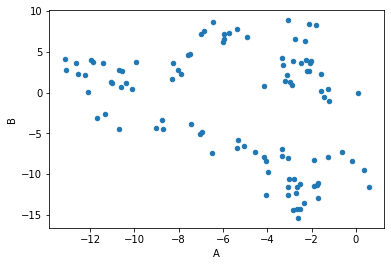

<Figure size 432x288 with 0 Axes>

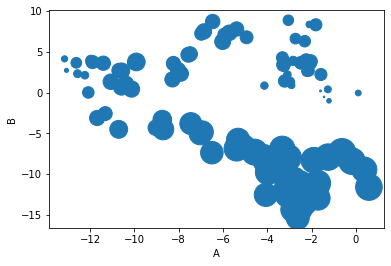

<Figure size 432x288 with 0 Axes>

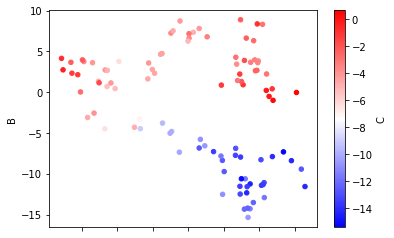

<Figure size 432x288 with 0 Axes>

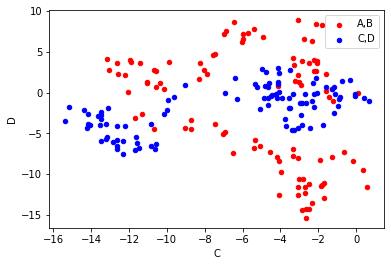

In [16]:
np.random.seed(111)

print('''
# no.2-1
# A列とB列をX,Y軸とした散布図を描画する。
>>> plt.figure()
>>> d.plot(kind='scatter', x='A', y='B')''')
plt.figure()
d.plot(kind='scatter', x='A', y='B')

print('''
# no.2-2
# C列の絶対値を50倍した値を点の大きさに指定して描画する。
# 絶対値にしているのは、点のサイズがマイナスは無効なため(warningが出力される)。
>>> plt.figure()
>>> d.plot(kind='scatter', x='A', y='B', s=d['C'].abs()*50)''')
plt.figure()
d.plot(kind='scatter', x='A', y='B', s=d['C'].abs()*50)

print('''
# no.2-3
# C列をカラースケールとして描画する。
# bwrは、C列の値の大きさによって、青-白-赤を適用する。
# (参照: https://matplotlib.org/stable/tutorials/colors/colormaps.html)
>>> plt.figure()
>>> d.plot.scatter(x='A', y='B', c='C', colormap='bwr')''')
plt.figure()
d.plot.scatter(x='A', y='B', c='C', colormap='bwr')

print('''
# no.2-4
# ２つの散布図を重ねて描画する。
>>> plt.figure()
>>> ax1 = d.plot.scatter(x='A', y='B', c='red', label='A,B')
>>> ax2 = d.plot.scatter(x='C', y='D', c='blue', label='C,D', ax=ax1)''')
plt.figure()
ax1 = d.plot.scatter(x='A', y='B', c='red', label='A,B')
ax2 = d.plot.scatter(x='C', y='D', c='blue', label='C,D', ax=ax1)


---
# 3.　ヒストグラム

### 入力データ
乱数列A,Bとグループ列key(XとYの2グループ)を作成

<pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
d = pd.DataFrame(
    {'key': ['X']*50+['Y']*25+['Z']*25,
     'A':np.random.randn(100),
     'B':np.random.randn(100)}
)
print(d)
</pre>

<img width="20%" height="20%" src="./figures/plotting/plotting3_data.png">

  <table border="1" style="table-layout:fixed;width:100%;">
    <colgroup>
      <col style="width:5%;">
      <col style="width:40%;"> 
      <col style="width:25%;">
      <col style="width:30%;">    
    </colgroup>
<tbody>

<tr><th align="left">no.</th><th align="left">実行コード</th><th>出力</th><th>備考</th></tr>
  
<tr style="background:#fff; border:1px solid #cc0000;">
<td>3-1</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d['A'].hist()
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting3-1.png"></td>
<td>
A列のヒストグラムを描画する。
</td>
</tr>
    
<tr style="background:#fff; border:1px solid #cc0000;">
<td>3-2</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d[['A', 'B']].hist(bins=20)
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting3-2.png"></td>
<td>
複数列のDataFrameをhistすると各列のヒストグラムが分割して描画される。<br>またbins=を指定することで、水準数(数値の分割数)を指定することができる。
</td>
</tr>

<tr style="background:#fff; border:1px solid #cc0000;">
<td>3-3</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d[['A', 'B']].plot(kind='hist', bins=20)
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting3-3.png"></td>
<td>
plot(kind='hist')で同じことをすると各列のヒストグラムが重ねて描画される。
</td>
</tr>

<tr style="background:#fff; border:1px solid #cc0000;">
<td>3-4</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d[['key', 'A']].hist(by='key')
</pre></td>
<td><img width="100%" src="./figures/plotting/plotting3-4.png"></td>
<td>
グループ列をbyで指定すると、グループ別にヒストグラムが分割描画される。
ただし、byで指定する列が集計可能な数値型の場合は、その列もチャートの描画対象になってしまうため、astype({'key':'object'})のようにobject型に変換する必要があることに注意されたい。
</td>
</tr>

<tr style="background:#fff; border:1px solid #cc0000;">
<td>3-5</td>
<td><pre style="overflow-x:auto;white-space:pre;padding: 1em; border-radius: 5px; background: #eeeeee">
plt.figure()
d.hist(by='key', layout=(3, 1))
</pre></td>
<td><img width="80%" src="./figures/plotting/plotting3-5.png"></td>
<td>
複数列のDataFrameをbyで描画するとグループ別にA,B列が重なったヒストグラムが分割描画される。
DataFrame.hist()はlayoutの指定も可能。
</td>
</tr>

</tbody>
</table>


# 入力データ: 乱数列A,Bとグループ列key(XとYの2グループ)を作成
>>> np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
>>> d = pd.DataFrame(
        {'key': ['X']*50+['Y']*25+['Z']*25,
         'A':np.random.randn(100),
         'B':np.random.randn(100)}
    )
>>> print(d)
   key         A         B
0    X -1.133838  0.103719
1    X  0.384319 -0.033509
2    X  1.496554  0.676452
3    X -0.355382 -1.052249
4    X -0.787534 -1.371965
..  ..       ...       ...
95   Z  2.103122  0.823497
96   Z -1.050397 -0.944587
97   Z -0.127114  0.511589
98   Z -1.584131 -1.364881
99   Z -0.611074  0.357740

[100 rows x 3 columns]

# no.3-1
# A列のヒストグラムを描画する。
>>> plt.figure()
>>> d['A'].hist()

# no.3-2
# 複数列のDataFrameをhistすると各列のヒストグラムが分割して描画される。
# またbins=を指定することで、水準数(数値の分割数)を指定することができる。
>>> plt.figure()
>>> d[['A', 'B']].hist(bins=20)

# no.3-3
# plot(kind='hist')で同じことをすると各列のヒストグラムが重ねて描画される。
>>> plt.figure()
>>> d[['A', 'B']].plot(kind='hist', bins=20)

# no.3-4
# グループ列をbyで指定すると、グループ別にヒストグラムが分割描画される。
# ただし、byで指定する列が集計可能な数値型の場合は、そ

array([<AxesSubplot:title={'center':'X'}>,
       <AxesSubplot:title={'center':'Y'}>,
       <AxesSubplot:title={'center':'Z'}>], dtype=object)

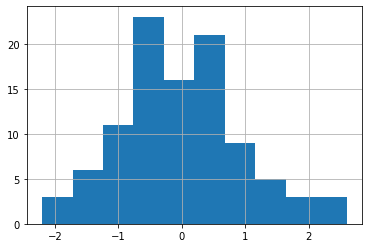

<Figure size 432x288 with 0 Axes>

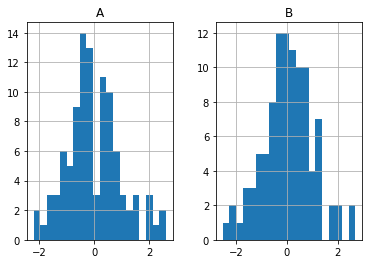

<Figure size 432x288 with 0 Axes>

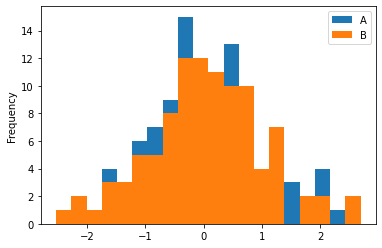

<Figure size 432x288 with 0 Axes>

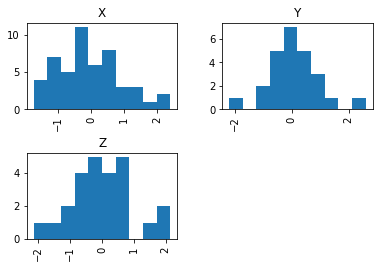

<Figure size 432x288 with 0 Axes>

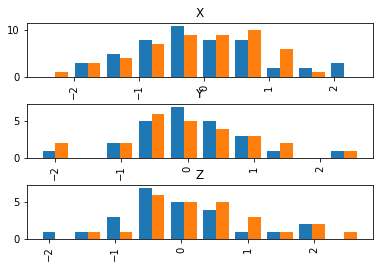

In [3]:
print('''
# 入力データ: 乱数列A,Bとグループ列key(XとYの2グループ)を作成
>>> np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
>>> d = pd.DataFrame(
        {'key': ['X']*50+['Y']*25+['Z']*25,
         'A':np.random.randn(100),
         'B':np.random.randn(100)}
    )
>>> print(d)''')
np.random.seed(111)  # 結果が同じになるように乱数seedをセットする
d = pd.DataFrame(
    {'key': ['X']*50+['Y']*25+['Z']*25,
     'A':np.random.randn(100),
     'B':np.random.randn(100)}
)
print(d)

print('''
# no.3-1
# A列のヒストグラムを描画する。
>>> plt.figure()
>>> d['A'].hist()''')
plt.figure()
d['A'].hist()

print('''
# no.3-2
# 複数列のDataFrameをhistすると各列のヒストグラムが分割して描画される。
# またbins=を指定することで、水準数(数値の分割数)を指定することができる。
>>> plt.figure()
>>> d[['A', 'B']].hist(bins=20)''')
plt.figure()
d[['A', 'B']].hist(bins=20)

print('''
# no.3-3
# plot(kind='hist')で同じことをすると各列のヒストグラムが重ねて描画される。
>>> plt.figure()
>>> d[['A', 'B']].plot(kind='hist', bins=20)''')
plt.figure()
d[['A', 'B']].plot(kind='hist', bins=20)

print('''
# no.3-4
# グループ列をbyで指定すると、グループ別にヒストグラムが分割描画される。
# ただし、byで指定する列が集計可能な数値型の場合は、その列もチャートの描画対象になってしまうため、
# d[['key', 'A']].astype({'key':'object'}).hist(by='key') のようにbyの列の型をobject型に変換する必要があることに注意されたい。
>>> plt.figure()
>>> d[['key', 'A']].hist(by='key')''')
plt.figure()
d[['key', 'A']].hist(by='key')

print('''
# no.3-5
# 複数列のDataFrameをbyで描画するとグループ別にA,B列が重なったヒストグラムが分割描画される。
# DataFrame.hist()はlayoutの指定も可能。
>>> plt.figure()
>>> d.hist(by='key', layout=(3, 1))''')
plt.figure()
d.hist(by='key', layout=(3, 1))
